In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_rel




In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
alternate_color = False
simple_minerva_label = False


inclu_DCC = False

key ="agp_bmi_kmer"#"MINERVA_grid_t2d_calibrate"
subfile = ""
select_columns_bool = False
shortened_shortened = False
trans_vec = False
add_linmodel_type = False




if "calibrate" in key:
    numPc = [0,1,2,3,4,5,6,7,8,9]

    if "t2d" in key:
        
        phen = ["bin_t2d"  for i in range(len(numPc))]
        phen_pretty = "Type II diabetes status"
        folder_names = ["T2D_k7" for i in range(0,len(numPc))]
        limit_spec =(0.4,0.9)
        
    elif "gibbons" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Gibbons et al.)"
        folder_names = ["CRC_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,1.05)
        
    elif "thomas" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status \n (7-mers Thomas et al.)"
        folder_names = ["Thomas_k7" for i in range(0,len(numPc))]
        limit_spec =(0.58,0.9)
        
    elif "tom_" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc)+1)]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu" for i in range(0,(len(numPc)+1))]
        limit_spec =(0.5,0.9)
    elif "hispanic" in key:
        phen = ["antibiotic"  for i in range(len(numPc))]
        phen_pretty = "Antibiotic history (HCHS/SOL)"
        folder_names = ["Hispanic_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,0.81)   
        
    elif "agp_abx" in key:
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "abx"
        folder_names = ["AGP_max_k7" for i in range(0,len(numPc))]
        limit_spec =(0.57,0.68)
    
    elif "agp_bmi" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "body mass index"
        folder_names = ["AGP_max_k5" for i in range(0,len(numPc))]
        limit_spec =(-0.12,0.35)
    
        
        
    if any(x in key for x in ["t2d","gibbons","thomas","hispanic","agp_abx","tom"]):
        metric_word = "auc_all"
        chosen_classifier = "Random Forest"
        title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
        phen_type = "class"
    elif "bmi" in key:
        metric_word = "pearson"
        chosen_classifier = ""
        title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
        phen_type = "pred"
     
    select_columns_bool = True
    if simple_minerva_label:
        select_labels = numPc #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
   
    else:
        select_labels = numPc#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    file_names =['MINERVA_grid_PC' + str(numPc[i]) for i in range(0,len(numPc))]
    
    pair_test_all = False
    shortened=True
    not_rotate=True
    trans_vec = False
    trans = "clr_scale"
    
    if "tom_" in key:
        select_labels = ["raw"] + numPc#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        file_names =["raw_grid"] + ['MINERVA_grid_PC' + str(numPc[i]) for i in range(0,len(numPc))]
        trans_vec = True
        trans = ["none"] + ["clr_scale" for i in range(0,len(numPc))]
        
    
elif "otu_v_kmer" in key:
    
    if "CRC" in key:
        numPc = [0,0,0]
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Gibbons et al.)"
        folder_names = ["CRC_otu","CRC_k6","CRC_k7"]
        limit_spec =(0.53,1)
        select_labels = ["OTU","k=6","k=7"]
        
    if "AGP" in key:
        numPc = [0,0,0]
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "antibiotic history (AGP, McDonald et al.)"
        folder_names = ["AGP_complete_otu","AGP_max_k5","AGP_max_k6"]
        limit_spec =(0.55,0.72)
        select_labels = ["OTU","k=5","k=6"]

    if "Thomas" in key:
        numPc = [0,0,0,0,0,0]
        phen = ["bin_crc_normal"   for i in range(len(numPc))]
        phen_pretty ="colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","Thomas_k6","Thomas_k7","CRC_thomas_otu","Thomas_k6","Thomas_k7"]
        limit_spec =(0.5,0.9)
        select_labels = ["OTU","k=6","k=7","MINERVA \n OTU","MINERVA \n  k=6","MINERVA \n k=7"]
        
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    phen_type = "class"
    select_columns_bool = True
    
    #file_names =['raw_grid' for i in range(0,len(numPc))]
    file_names =['raw_grid' ,'raw_grid' ,'raw_grid']# ,'MINERVA_grid' ,'MINERVA_grid' ,'MINERVA_grid' ]
    pair_test_all = True
    shortened=True
    not_rotate=True
    trans_vec = True
    #trans = ['none' for i in range(0,len(numPc))]
    trans = ['none','none','none','clr_scale','clr_scale','clr_scale' ]
    
#"Gibbons_kmer_otu_v_something" 
elif "otu_v_something" in key:
    
    if "Thomas" in key:
        numPc = [0,0]
        phen = ["bin_crc_normal"   for i in range(len(numPc))]
        phen_pretty ="colorectal cancer status\n(7-mers CRC-WGS)"
        folder_names = ["Thomas_k7", "Thomas_k7"]#,"CRC_thomas_otu"]
        limit_spec =(0.52,0.82)
        select_labels = ["Uncorrected ","DCC"]#"Include batch\n label in prediction", ["OTU",'ComBat \n OTU']#,"MINERVA \n OTU",]
   
    if "Gibbons_kmer" in key:
        numPc = [0,0]
        phen = ["bin_crc_normal"   for i in range(len(numPc))]
        phen_pretty ="colorectal cancer status\n(7-mers CRC-16S)"
        folder_names = ["CRC_k7","CRC_k7"]#,"CRC_thomas_otu"]
        limit_spec =(0.55,0.93)
        select_labels =  ["Uncorrected ", "DCC"]#"Include batch\n label in prediction",
   
    if "Gibbons_otu" in key:
        numPc = [0,0]
        phen = ["bin_crc_normal"   for i in range(len(numPc))]
        phen_pretty ="colorectal cancer status\n(OTUs CRC-16S)"
        folder_names = ["CRC_otu","CRC_otu"]#,"CRC_thomas_otu"]
        limit_spec =(0.64,0.93)
        select_labels = ["Uncorrected ", "DCC"]#["OTU",'ComBat \n OTU']#,"MINERVA \n OTU",]
   
    if "thomas" in key:
        numPc = [0,0]
        phen = ["bin_crc_normal"   for i in range(len(numPc))]
        phen_pretty ="colorectal cancer status \n (OTUs CRC-WGS)"
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu"]#,"CRC_thomas_otu"]
        limit_spec =(0.64,0.93)
        select_labels = ["Uncorrected ","DCC"]#
    if "AGP_otu" in key:
        numPc = [0,0]
        phen = ["bin_antibiotic_last_year"   for i in range(len(numPc))]
        phen_pretty ="antibiotic history\n(OTUs AGP)"
        folder_names = ["AGP_complete_otu","AGP_complete_otu"]#,"CRC_thomas_otu"]
        limit_spec =(0.62,0.72)
        select_labels =  ["Uncorrected ","DCC"]#
    if "AGP_kmer" in key:
        numPc = [0,0]
        phen = ["bin_antibiotic_last_year"   for i in range(len(numPc))]
        phen_pretty ="antibiotic history \n (7-mers AGP)"
        folder_names = ["AGP_max_k7","AGP_max_k7"]#,"CRC_thomas_otu"]
        limit_spec =(0.58,0.66)
        select_labels = ["Uncorrected ", "DCC"]#[["Kmer",'Kmer_data_aug','OTU_domaincorr'] 
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    phen_type = "class"
    select_columns_bool = True
    
    #file_names =['raw_grid' for i in range(0,len(numPc))]
    #file_names =['rawVAL_grid','ComBatlogscaleVAL_grid','limma_grid','bmc_grid','dataaug_grid',"MINERVA_grid"]#,"MINERVA0_grid","MINERVA_grid"]##['raw_grid','dataaug_grid','domaincorr_grid']# ,'ComBatlogscale_grid' ]#,'MINERVA_grid'  ]
    file_names =['raw_grid',"domaincorr_grid"] #'dataaug_grid', 
    pair_test_all = True
    shortened=True
    not_rotate=False
    trans_vec = True
    #trans = ['none' for i in range(0,len(numPc))]
    #trans = ['none','logscale','none','none','none','clr_scale','clr_scale'] #'logscale']#,'clr_scale' ]
    trans = ['none','none']
        
else:
    
    numPc = [0,0,0,0,0,0] 
    
    
    if inclu_DCC:
        if "gibbons_kmer" in key:
            numPc = [0,0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status\n (k-mers CRC-16S)"
            folder_names = ["CRC_k7" for i in range(0,len(numPc))]
            limit_spec =(0.52,1.0)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"domaincorr_grid","MINERVA_grid_PC0",'MINERVA_grid_PC1'] 

        elif "gibbons_otu" in key:
            numPc = [0,0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status\n (OTU CRC-16S)"
            folder_names = ["CRC_otu" for i in range(0,len(numPc))]
            limit_spec =(0.52,1.0)
            file_names = ['raw_grid','ComBatlogscale_grid','limma_grid','bmc_grid',"domaincorr_grid","MINERVA_grid_PC0",'MINERVA_grid_PC2'] 


        elif "thomas" in key:
            numPc = [0,0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status \n (k-mers CRC-WGS)"
            folder_names = ["Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7","Thomas_k7"]
            limit_spec =(0.53,0.93)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"domaincorr_grid","MINERVA_grid_PC0",'MINERVA_grid_PC3'] 


    #     elif "thoma_v_otu" in key:
    #         numPc = [0,0,0,0,0,0,0,0] 
    #         phen = ["bin_crc_normal"  for i in range(len(numPc))]
    #         phen_pretty = "colorectal cancer status (Thomas et al.)"
    #         folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7"]
    #         limit_spec =(0.5,1)
        elif "tom_" in key:
            numPc = [0,0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status \n (OTUs CRC-WGS)"
            #folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k7","Thomas_k7"]
            folder_names = ["CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu", "CRC_thomas_otu", "CRC_thomas_otu","CRC_thomas_otu"]
            limit_spec =(0.53,0.93)
            file_names = ['raw_grid','ComBatlogscale_grid','limma_grid','bmc_grid',"domaincorr_grid","MINERVA_grid_PC0",'MINERVA_grid_PC2'] 
    else:
        if "t2d" in key:

            phen = ["bin_t2d"  for i in range(len(numPc))]
            phen_pretty = "Type II diabetes status"
            folder_names = ["T2D_k6","T2D_k6","T2D_k6","T2D_k6","T2D_k7","T2D_k7"]
            limit_spec =(0.4,1)

        elif "gibbons_kmer" in key:
            numPc = [0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status\n (k-mers CRC-16S)"
            folder_names = ["CRC_k7" for i in range(0,len(numPc))]
            limit_spec =(0.52,1.0)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC1'] 

        elif "gibbons_otu" in key:
            numPc = [0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status\n (OTU CRC-16S)"
            folder_names = ["CRC_otu" for i in range(0,len(numPc))]
            limit_spec =(0.52,1.0)
            file_names = ['raw_grid','ComBatlogscale_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC2'] 


        elif "thomas" in key:
            numPc = [0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status \n (k-mers CRC-WGS)"
            folder_names = ["Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7"]
            limit_spec =(0.53,0.93)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC3'] 


    #     elif "thoma_v_otu" in key:
    #         numPc = [0,0,0,0,0,0,0,0] 
    #         phen = ["bin_crc_normal"  for i in range(len(numPc))]
    #         phen_pretty = "colorectal cancer status (Thomas et al.)"
    #         folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7"]
    #         limit_spec =(0.5,1)
        elif "tom_" in key:
            numPc = [0,0,0,0,0,0,0]
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status \n (OTUs CRC-WGS)"
            #folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k7","Thomas_k7"]
            folder_names = ["CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu", "CRC_thomas_otu", "CRC_thomas_otu","CRC_thomas_otu"]
            limit_spec =(0.53,0.93)
            file_names = ['raw_grid','ComBatlogscale_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC2'] 



        elif "tomLODO" in key:
            phen = ["bin_crc_normal"  for i in range(len(numPc))]
            phen_pretty = "colorectal cancer status (Thomas et al.)"
            folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k7","Thomas_k7"]
            limit_spec =(0.3,1)

        elif "tomDC" in key:
            phen = ["bin_crc_normal","bin_crc_normal","bin_crc_normal","bin_crc_adenomaORnormal","bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]
            phen_pretty = "colorectal cancer status (Thomas et al.)"
            folder_names = ["CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu"]
            limit_spec =(0.3,1)

        elif "hispanic" in key:
            phen = ["antibiotic"  for i in range(len(numPc))]
            phen_pretty = "Antibiotic history (HCHS/SOL)"
            folder_names = ["Hispanic_k6","Hispanic_k6","Hispanic_k6","Hispanic_k6","Hispanic_k7","Hispanic_k7"]
            limit_spec =(0.5,0.9)




        elif "agp_bmi_kmer" in key:

            phen = ["bmi_corrected"  for i in range(len(numPc))]
            phen_pretty = "body mass index \n (k-mers AGP)"
            folder_names = ["AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5"]
            limit_spec =(-0.06,0.33)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC1'] 

        elif "agp_bmi_otu" in key:
            phen = ["bmi_corrected"  for i in range(len(numPc))]
            phen_pretty = "body mass index \n (OTUs AGP)"
            folder_names = ["AGP_complete_otu" for i in range(len(phen))]
            limit_spec =(-0.06,0.33)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC8'] 

        elif "agp_abx_kmer" in key:
            numPc = [0,0,0,0,0,0]
            phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
            phen_pretty = "antibiotic history \n (k-mers AGP)"
            folder_names = ["AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6"]
            limit_spec =(0.585,0.72)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC1'] 
        elif "agp_abx_otu" in key:
            numPc = [0,0,0,0,0,0]
            phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
            phen_pretty = "antibiotic history \n (OTUs AGP)"
            folder_names = ["AGP_complete_otu" for i in range(len(phen))]
            limit_spec =(0.585,0.72)
            file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA_grid_PC0",'MINERVA_grid_PC2'] 

        
    if any(x in key for x in ["t2d","gibbons","thoma","hispanic","tom","agp_abx"]):
        metric_word = "auc_all"
        chosen_classifier = "Random Forest"
        title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
        phen_type = "class"
    elif "bmi" in key:
        metric_word = "pearson"
        chosen_classifier = ""
        title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
        phen_type = "pred"
    else:
        select_labels = ["Before","ComBat","limma","BMC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        
     
    select_columns_bool = True
    
    pair_test_all = False
    shortened=True
    not_rotate=False
    trans_vec = True
    trans = ["none","none","none","none","clr_scale","clr_scale"]
    
    
    if simple_minerva_label:
        select_labels = ["OTU_Raw","OTU_MINERVA","Raw","ComBat","limma","BMC","MINERVA0","MINERVA"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
        if "_v_" in key:
            file_names = ['raw_grid','MINERVA_grid','raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA0_grid",'MINERVA_grid'] 

            select_labels = ["OTU_Raw","OTU_MINERVA","Raw","ComBat","limma","BMC","MINERVA0","MINERVA"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["none","clr_scale","none","none","none","none","clr_scale","clr_scale"]
        if "tomLODO" in key:
            file_names = ['rawLODO_grid','pc_lodo_grid','rawLODO_grid','pc_lodo_grid',"rawLODO4_grid",'MINERVALODO_grid'] 

            select_labels = ["OTU_Raw (LODO)","OTU_PC (LODO)","Kmer7_raw (LODO)","Kmer6_PC (LODO)","","MINERVA (LODO)"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["none","clr_scale","none","clr_scale","clr_scale","clr_scale"]
        if "tomDC" in key:
            file_names = ['rawfilter_TRUE','DomainCorrectfilter_TRUE','minerva_first4filter_TRUE','rawfilter_TRUE','DomainCorrectfilter_TRUE','minerva_first4filter_TRUE'] 

            select_labels = ["OTU_Raw ","OTU_DC_Normal","MINERVA_Normal","OTU_Raw_Adenoma","OTU_DC_AdenomaNormal","MINERVA_Adenoma"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["clr_scale","clr_scale","clr_scale","clr_scale","clr_scale","clr_scale"]
            
        if "tom_" in key:
            file_names = ['rawVAL_grid','ComBatlogscaleVAL_grid','ComBatlogscaleVAL_grid',
                          'MINERVA_grid_PC2','MINERVA_VAL_grid','ComBatlogscaleVAL_grid'] 

            select_labels = ["OTU Raw","OTU ComBat (logscale)","OTU MINERVA1 (clrscale)",
                            "OTU MINERVA2 (clrscale)",
                             "OTU MINERVA (clrscale)",
                            "7-mer ComBat (logscale)"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["none","logscale","clr_scale","clr_scale","clr_scale","logscale"]
        
            
     
            

    else:
        print("HELLO")
        if "gibbons_kmer" in key:
            print("H4")
            trans = ["none","none","none","none","clr_scale","clr_scale"]
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

            if inclu_DCC:
                trans = ["none","none","none","none","none","clr_scale","clr_scale"]   
                select_labels = ["Uncorrected","ComBat","limma","BMC","DCC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

        elif "gibbons_otu" in key:
            trans = ["none","logscale","none","none","clr_scale","clr_scale"]
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1 to 2)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

            if inclu_DCC:
                trans = ["none","logscale","none","none","none","clr_scale","clr_scale"]
                select_labels = ["Uncorrected","ComBat","limma","BMC","DCC","CLR","PC Correction\n (PC 1 to 2)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

           
        elif "tom_" in key or "gibbons_otu" in key:
            print("H3")
            trans = ["none","logscale","none","none","clr_scale","clr_scale"]
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1 to 2)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

            if inclu_DCC:
                trans = ["none","logscale","none","none","none","clr_scale","clr_scale"]
                select_labels = ["Uncorrected","ComBat","limma","BMC","DCC","CLR","PC Correction\n (PC 1 to 2)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

     
        elif "thomas" in key:
            print("H2")
            trans = ["none","none","none","none","clr_scale","clr_scale"]
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1 to 3)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
            if inclu_DCC:
                trans = ["none","none","none","none","none","clr_scale","clr_scale"]
                select_labels = ["Uncorrected","ComBat","limma","BMC","DCC","CLR","PC Correction\n (PC 1 to 3)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
     
            
        elif "agp_abx_otu" in key:
            print("H1")
            trans = ["none","logscale","none","none","clr_scale","clr_scale"]
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1 to 2)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        
            if inclu_DCC:
                trans = ["none","logscale","none","none","clr_scale","clr_scale"]
                select_labels = ["Uncorrected","ComBat","limma","BMC","DCC","CLR","PC Correction\n (PC 1 to 2)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        
     
        elif "agp_abx_kmer" in key:
            print("HE")
            trans = ["none","none","none","none","clr_scale","clr_scale"]
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        
            if inclu_DCC:
                trans = ["none","none","none","none","none","clr_scale","clr_scale"]
                select_labels = ["Uncorrected","ComBat","limma","BMC","DCC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        
     
        elif "agp_bmi_otu" in key:
            print("HE")
            trans = ["none","logscale","none","none","clr_scale","clr_scale"]
     
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1 to 8)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
      
        else:
            print("NO")
            select_labels = ["Uncorrected","ComBat","limma","BMC","CLR","PC Correction\n (PC 1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        
    
lin_model = "reg"
if not trans_vec:
    trans = ["clr_scale" for i in range(len(file_names))]
data_type = "kmer"

file_names = [file_names[f] + "_trans_" + trans[f] for f in range(len(file_names))]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of ' + phen_pretty# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    #'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = [chosen_classifier for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    #title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 

 

HELLO
NO


In [4]:
"gibbons_otu"  in key

False

In [5]:
df_metric = pd.DataFrame()

In [6]:
simple_minerva_label

False

In [7]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        if add_linmodel_type:
            
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_lin_model_" + lin_model +"_pearson_and_mse.pkl"
        
        else:
            # "_lin_model_" + lin_model +
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        
        filename_temp = data_folder + folder_names[f] + "/" +subfile + data_type + "_BatchCorrected_"+ phen[f] + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all" or metric_word == "accuracy":
            index = folder_names[f] + file_names[f] + phen[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            if "agp_abx" in key:
                
                df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word][0:13])
            else:
                df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_raw_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_ComBat_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_limma_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_bmc_grid_trans_none_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_MINERVA_grid_PC0_trans_clr_scale_pearson_and_mse.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k5/kmer_BatchCorrected_bmi_corrected_MINERVA_grid_PC1_trans_clr_scale_pearson_and_mse.pkl


In [8]:
import numpy as np
import scipy
#delta = np.array(df_metric.iloc[:,4]-df_metric.iloc[:,0])
#print(np.mean(delta))
#print(scipy.stats.sem(delta))


In [9]:
df_metric

,raw_grid_trans_none,ComBat_grid_trans_none,limma_grid_trans_none,bmc_grid_trans_none,MINERVA_grid_PC0_trans_clr_scale,MINERVA_grid_PC1_trans_clr_scale
0,0.065689,0.115205,0.064116,0.064116,0.242078,0.240892
1,0.092385,0.105238,0.091545,0.091583,0.229426,0.225303
2,0.051062,0.056216,0.049892,0.049964,0.215868,0.211698
3,0.116099,0.142432,0.116343,0.116343,0.192887,0.192522
4,0.063004,0.067127,0.060359,0.060357,0.244773,0.245857
5,0.062218,0.070318,0.061684,0.061709,0.207766,0.205222
6,0.079458,0.122328,0.079637,0.079463,0.198491,0.192760
7,0.066923,0.099245,0.066751,0.066968,0.252691,0.252468
8,0.073909,0.113769,0.070957,0.070963,0.203137,0.193580
9,0.077682,0.116989,0.080326,0.080322,0.217416,0.206343


In [10]:
#df_metric.sum(axis=1)
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

In [11]:
file_names

['raw_grid_trans_none',
 'ComBat_grid_trans_none',
 'limma_grid_trans_none',
 'bmc_grid_trans_none',
 'MINERVA_grid_PC0_trans_clr_scale',
 'MINERVA_grid_PC1_trans_clr_scale']

In [12]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

1
2.3932262933306496e-13
2
0.3173779675652713
3
0.326715702979795
4
2.9135790386420486e-37
5
3.825157127190396e-37


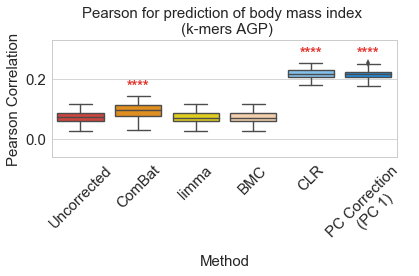

In [24]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only




# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
sns.set_style("whitegrid")
#sns.set_theme("whitegrid")
if select_columns_bool:
    
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        palette = sns.color_palette("Blues", df_metric.shape[1])
        plot_color = ["#ABB2B9"] + palette.as_hex()[1:]
        
        
        
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        if not alternate_color:
            #palette = sns.color_palette("Reds", df_metric.shape[1]-1)
            #plot_color = palette.as_hex()[::-1] + ["#0093FF"]#["#01d3e8"]
            
            #palette = sns.color_palette("Reds", 2)
            #reds_color = palette.as_hex()[1:2]
            
            #palette = sns.color_palette("Oranges", df_metric.shape[1]-2)
            #oranges_color = palette.as_hex()
            
            #plot_color = reds_color + oranges_color +["#0093FF"]
            
            #plot_color['#808B96','#F2F4F4',]
            plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#72C1FC","#0093FF"]
            if inclu_DCC:

                plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#C3FFCE","#72C1FC","#0093FF"]
            if "otu_v_something" in key:
                plot_color =['#e32f27',"#C3FFCE"]
            
#             if "_v_" in key:
#                 plot_color =['#e32f27',"#72C1FC",'#e32f27','#FF9300','#FFE800','#fdd0a2',"#72C1FC","#0093FF"]
                
        else:
            palette1 = sns.color_palette("Reds", 2) [::-1] 
            palette2 = sns.color_palette("Blues", 2)
            plot_color = palette1.as_hex() + palette2.as_hex()
            
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(rotation=45,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
g.set(ylim=limit_spec)

g.set_title(title)

# box_line_col = ["#808B96","#808B96","#808B96","#808B96","#808B96","#000000","#000000"]

# for i,box_col in enumerate(box_line_col):
#     mybox = g.artists[i]
#     mybox.set_edgecolor(box_col)


#g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
  
# box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
#                                       (df_metric.columns[0], df_metric.columns[2]),
#                                       (df_metric.columns[0], df_metric.columns[3]),
#                                       (df_metric.columns[0], df_metric.columns[4])]
# for a,b in box_pairs:
#     print(a,b)
#     t_stat = scipy.stats.ttest_rel(df_metric[a],df_metric[b], axis=0, nan_policy='propagate')
#     print(t_stat.pvalue)
#     if t_stat.pvalue < 0.05:
#         ax.text(x=1, y=1, s=asterisk[0], va='center') 

if not_rotate:
    
    ref_col = np.tile(df_metric.iloc[:,0], (df_metric.shape[1], 1))#[df_metric.iloc[:,0]]
    tick_vec = g.get_xticks()[1:]
    
else:
    
    #ref_col = np.tile(df_metric.iloc[:,5], (5, 1))#[df_metric.iloc[:,4]]
    #tick_vec = g.get_xticks()[:-1]
    
    #if "_v_" in key:
    ref_col = np.tile(df_metric.iloc[:,0], (5, 1))#[df_metric.iloc[:,4]]
    if any (short_key in key for short_key in ["gibbons_kmer","gibbons_otu","thomas" ,"tom_","agp_abx_otu","agp_abx_kmer"] ):

        ref_col = np.tile(df_metric.iloc[:,0], (6, 1))#[df_metric.iloc[:,4]]
    #tick_vec = g.get_xticks()[:-1]
    tick_vec = g.get_xticks()[1:]
        
    
    
    #ref_col = np.tile(df_metric.iloc[:,4], (4, 1))
    #ref_col = np.vstack([ref_col, df_metric.iloc[:,0]])
    #tick_vec = g.get_xticks()
    
old_system = False
if old_system:
    asterisk = ["ns","*","**","***","****",""]
else:
    asterisk = ["*","**","***","****",""] # new


vertical_offset = 0.02 #0.05
for xtick_ind in range(len(tick_vec)):
    asterisk_color = '#e32f27'
    #print(xtick_ind)
   
    
    
    xtick = tick_vec[xtick_ind]
    print(xtick)
    
    compare_col = df_metric.iloc[:,xtick]
    median = np.max(compare_col)
    
    
    t_res = ttest_rel(ref_col[xtick_ind], compare_col,nan_policy ='omit')
    p = t_res.pvalue
    print(p)
    
    if p > 5.00e-02 and p <= 1.00e+00:
        if old_system:
            asterisk_index = 0
        else:
            asterisk_index = 4
    
    
    
    elif 1.00e-02 < p  and p <= 5.00e-02:
        
        if old_system:
            asterisk_index = 1
        else:
            asterisk_index = 0
        
    elif 1.00e-03 < p and p <= 1.00e-02:
        asterisk_index = 1
        
        if old_system:
            asterisk_index = 2
        else:
            asterisk_index = 1
    elif 1.00e-04 < p <= 1.00e-03:
        if old_system:
            asterisk_index = 3
        else:
            asterisk_index = 2
    elif p <= 1.00e-04:
        if old_system:
            asterisk_index = 4
        else:
            asterisk_index = 3
    else:
        if old_system:
            asterisk_index = 5
        else:
            asterisk_index = 4
        
    
    if p < 5.00e-02  and not_rotate and np.nanmean(ref_col[xtick_ind]) < np.nanmean(compare_col):
        print("meh")
        if old_system:
            asterisk_index = 5
        else:
            asterisk_color = "#808B96"
    if p < 5.00e-02  and not not_rotate and np.nanmean(ref_col[xtick_ind]) > np.nanmean(compare_col):
        print("meh")
        if old_system:
            asterisk_index = 5
        else:
            asterisk_color = "#808B96"
        
    #print(asterisk_index)
    #print(asterisk[asterisk_index] )
        
        
        
        
    if not_rotate:
        g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
            horizontalalignment='center',size='large',color="#808B96",weight='semibold')
    else:
        
        g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
            horizontalalignment='center',size='large',color=asterisk_color,weight='semibold') #	 #"#0093FF"
    


#g.yaxis.grid(False)
if metric_word== "pearson":
    g.set(xlabel="Method", ylabel = "Pearson Correlation")
else:
    if not_rotate:
        if "otu_v_kmer" in key:
            g.set(xlabel="Data type", ylabel = "AUC")
        elif "otu_v_something" in key:
            g.set(xlabel="Methods", ylabel = "AUC")
        else:
            g.set(xlabel="Number of PCs", ylabel = "AUC")
    else:
        g.set(xlabel="Method", ylabel = "AUC")



#
plt.rc('figure', titlesize=25)# controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=12) 

plt.tight_layout()
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')
plt.show()





In [14]:
xtick_ind = 3
np.nanmean(ref_col[xtick_ind]) > np.nanmean(compare_col)

False

In [15]:
#np.repeat(ref_col, 4)

test = np.tile(ref_col, (4, 1))
#np.append(test,df_metric.iloc[:,4],axis=1)





In [16]:
df_metric.mean(axis=0)

raw_grid_trans_none                 0.073342
ComBat_grid_trans_none              0.095226
limma_grid_trans_none               0.072997
bmc_grid_trans_none                 0.073010
MINERVA_grid_PC0_trans_clr_scale    0.219109
MINERVA_grid_PC1_trans_clr_scale    0.216380
dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

limma_grid_trans_none v.s. bmc_grid_trans_none: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-4.701e-01
raw_grid_trans_none v.s. bmc_grid_trans_none: t-test paired samples with Bonferroni correction, P_val=6.534e-01 stat=9.907e-01


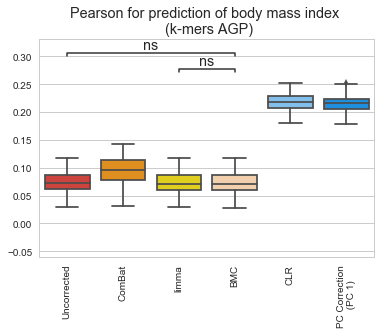

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")


x = "Method"
y = "AUC"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df_metric,palette=plot_color)
sns.set_context("paper", font_scale=1.5) 
sns.set_style("whitegrid")
if pair_test_all:
    if shortened:
        if shortened_shortened:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[2], df_metric.columns[3])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)
        else:
            if key == 'Gibbons':
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                      (df_metric.columns[0], df_metric.columns[2]),
                                      (df_metric.columns[0], df_metric.columns[3]),
                                      (df_metric.columns[0], df_metric.columns[4]),
                                       (df_metric.columns[1], df_metric.columns[4])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)
            elif "Thomas" in key:
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)
            else:
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                      (df_metric.columns[0], df_metric.columns[2]),
                                      (df_metric.columns[0], df_metric.columns[3]),
                                      (df_metric.columns[0], df_metric.columns[4])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)

    else:
        add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4]),
                                  (df_metric.columns[0], df_metric.columns[5]),
                                  (df_metric.columns[0], df_metric.columns[6])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)

else:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[2], df_metric.columns[3]),
                              (df_metric.columns[0], df_metric.columns[3])],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)
# , (df_metric.columns[0], df_metric.columns[5])
if not_rotate:
    ax.set_xticklabels(labels = select_labels,fontsize= 13)
else:
    ax.set_xticklabels(rotation=90,labels = select_labels)
#ax.set_yticklabels(fontsize= 10)
ax.set(ylim=limit_spec)
ax.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '_2.pdf',bbox_inches='tight')
#(df_metric.columns[0], df_metric.columns[2]),
#                              (df_metric.columns[0], df_metric.columns[3]),
#                             (df_metric.columns[0], df_metric.columns[4]),
#                             (df_metric.columns[0], df_metric.columns[5])

In [18]:
shortened

True

In [19]:
np.mean(np.array(df_metric.sum(axis=0)))

6.250527898127043

In [20]:
test = df_metric.sum(axis=0)
        
    
    
    

In [21]:
test

raw_grid_trans_none                  3.667083
ComBat_grid_trans_none               4.761280
limma_grid_trans_none                3.649828
bmc_grid_trans_none                  3.650510
MINERVA_grid_PC0_trans_clr_scale    10.955457
MINERVA_grid_PC1_trans_clr_scale    10.819011
dtype: float64

In [22]:
sum(np.isnan(df_metric.sum(axis=0)))

0